<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/tensors/tensors_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [78]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Rest

### Some Random stfuff related to classification

In [79]:
# creating circles using scikit-learn's make_circles()
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(
    n_samples,
    noise = 0.03,
    random_state = 0
)
# x is a matrix of values
# y is array of labels , reprsenting an array belongs to which class, this one gives 2 classes, so the labels are [0,1]

In [80]:
x, y[:10]

(array([[ 0.80993549, -0.053514  ],
        [-0.13448628, -0.74209474],
        [-0.81250606, -0.62424399],
        ...,
        [-0.03234372,  0.73742125],
        [ 0.60763385,  0.52905531],
        [-0.55730617,  0.57250972]]),
 array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1]))

In [81]:
# using pandas to make dataframe and labels
circles = pd.DataFrame({
    'x0' : x[:,0],  # first column as x0
    'x1' : x[:,1],  # second column as x1
    'label' : y # labels column , belonging to either first or second class
})

circles.head()

,x0,x1,label
0,0.809935,-0.053514,1
1,-0.134486,-0.742095,1
2,-0.812506,-0.624244,0
3,0.583074,0.496568,1
4,-0.461320,0.659836,1


In [82]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

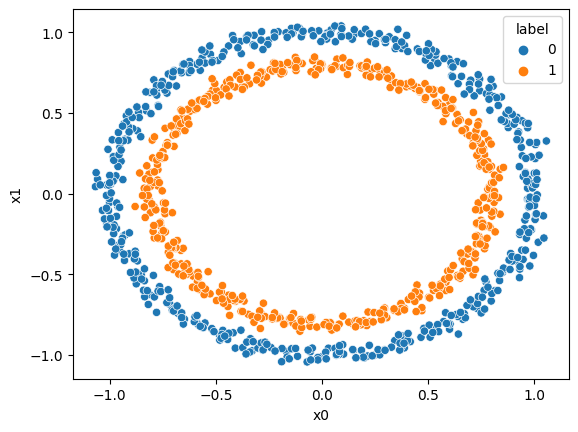

In [83]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    x, y,
    test_size = 0.19,
    train_size = 0.81
)

# visualizing the plots
sns.scatterplot(
    # x = x[:, 0],
    # y = x[:,1],
    data = circles,
    x = 'x0',
    y = 'x1',
    hue = 'label',
)


input_shape = [x.shape[1]]

In [84]:
from tensorflow import keras
from keras import layers, Sequential

# Create the model
model_one = Sequential([
    layers.Dense(1),
    layers.Dense(1),
])

# compile the model
model_one.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.SGD(),
    metrics = ['accuracy']
)

# fit/train the model
history = model_one.fit(
    x, y,
    epochs = 200,
    verbose = 0
)
# history.history['accuracy']

model_one.evaluate(x, y)


32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4980


[0.6931542754173279, 0.49799999594688416]

<Axes: >

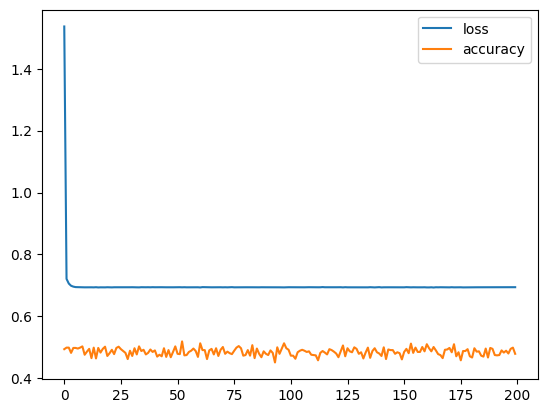

In [85]:
pd.DataFrame(history.history).plot()

This is not good to have accuracy of 50%, which is equivalent to guessing as it is binary.

Making the model more complex

In [86]:
# Create the model
model_two = Sequential([
    layers.Dense(
        units = 80,
        activation = 'relu',
        input_shape = input_shape
    ),
    layers.Dense(
        units = 80,
        activation= 'relu'
    ),
    layers.Dense(
        units = 1
    )
])

# compile the model
model_two.compile(
    loss = keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'],
    optimizer = keras.optimizers.SGD()
)

# fit/train the model
history = model_two.fit(
    x_train, y_train,
    epochs = 60,
    verbose = 0
)

# evaluating the model
model_two.evaluate(x_valid, y_valid)

6/6 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 1.0000


[0.07372056692838669, 1.0]

<Axes: >

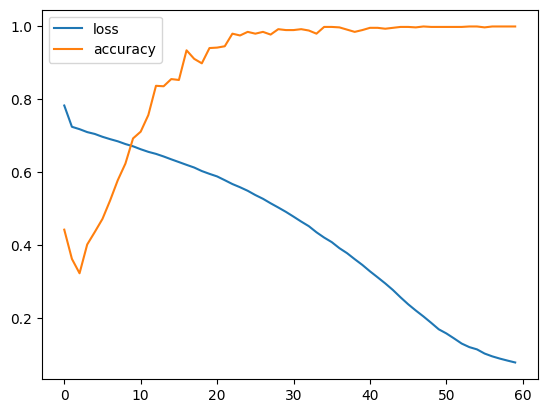

In [87]:
pd.DataFrame(history.history).plot()

## Multi-Class Classification

Using tensorflow's dataset , `tf.keras.datasets`
[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist#labels)

In [88]:
#@title Loading and Labelling the dataset
# importing the dataset
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

label_names = [
    'Tshirt/Top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle Boot'
]
print(label_names)
train_data.shape, train_label.shape, test_data.shape, test_label.shape

['Tshirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Index : 47881 , Item Type : Bag


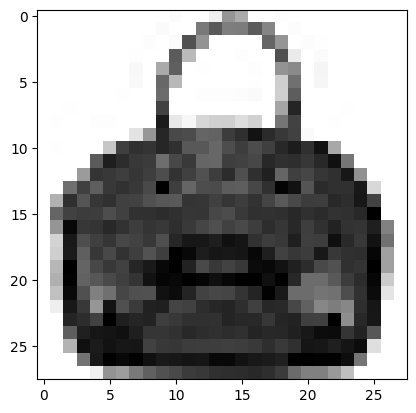

In [89]:
# visualizing  a random item in the list , we need to convert this data to image as it is in pixel information format
index = np.random.randint(0,60000)
item_type = label_names[train_label[index]]
print(f"Index : {index} , Item Type : {item_type}")
plt.imshow(train_data[index], cmap  = plt.cm.binary)  # changing it to binary or black/white

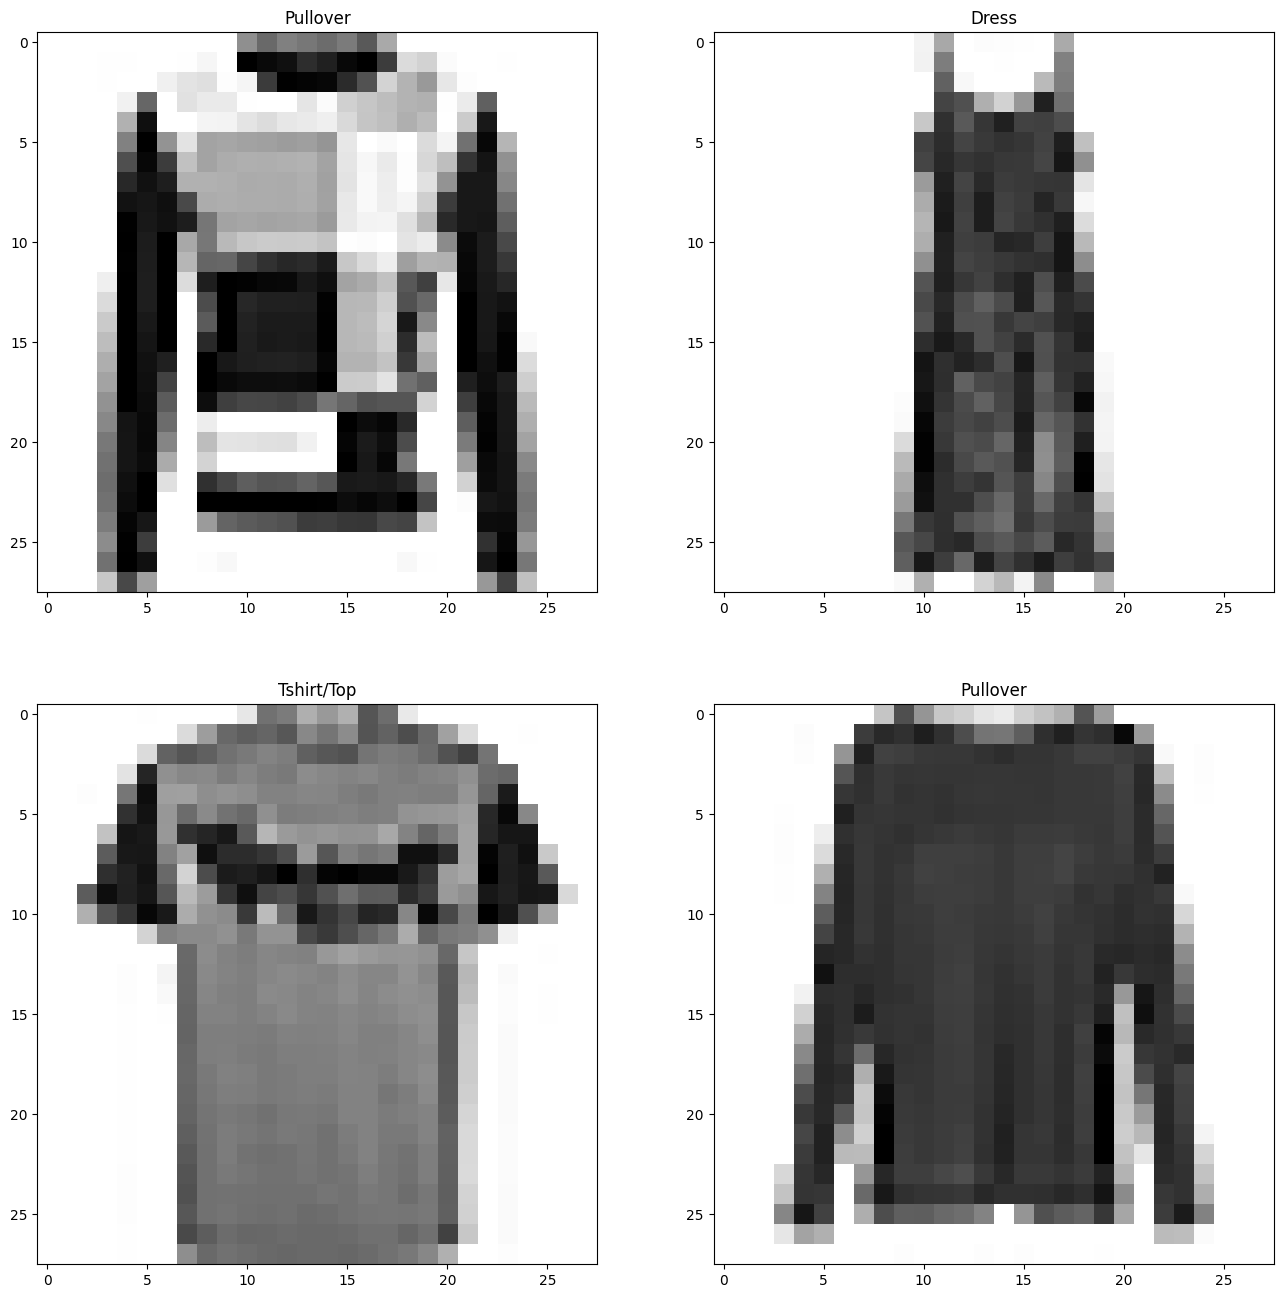

In [90]:
# plotting randomly 4 items
plt.figure(figsize = (16, 16))

for i in range(4):
    axis = plt.subplot(2, 2, i+1)
    index = np.random.randint(0,60000)
    plt.imshow(train_data[index], cmap = plt.cm.binary)
    plt.title(label_names[train_label[index]])
    plt.axis = False

In [91]:
#@title Model-Six

from tensorflow import keras
from keras import layers, Sequential

# create the model
model_six = Sequential([
    layers.Flatten(
        input_shape = (28, 28) # using flatten  to convert the 2D representation to a vector
    ),
    layers.Dense(
        units = 8,
        activation = 'relu',
    ),
    layers.Dense(
        units = 8,
        activation = 'relu'
    ),
    layers.Dense(
        units =  10,
        activation = 'softmax' # Softmax is well-suited for this task because it provides a probability distribution over all classes, allowing you to choose the class with the highest probability as the predicted class.
    )
])

# compile the model
model_six.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

# fit / train the model
non_normalized_history = model_six.fit(
    train_data, train_label,
    epochs = 50,
    validation_data = (test_data, test_label) # to see how does the model perform on test set during training
)

Epoch 1/50
1875/1875 [==============================] - 12s 5ms/step - loss: 2.6133 - accuracy: 0.1231 - val_loss: 2.1983 - val_accuracy: 0.1706
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 2.0987 - accuracy: 0.1847 - val_loss: 1.9709 - val_accuracy: 0.2289
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 1.7297 - accuracy: 0.3049 - val_loss: 1.6209 - val_accuracy: 0.3253
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5620 - accuracy: 0.3444 - val_loss: 1.5193 - val_accuracy: 0.3597
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5094 - accuracy: 0.3565 - val_loss: 1.5568 - val_accuracy: 0.3632
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4974 - accuracy: 0.3628 - val_loss: 1.5194 - val_accuracy: 0.3660
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4818 - accuracy: 0.3662 - val_loss: 1.4665 - val_accurac

In [92]:
model_six.evaluate(test_data, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.8042 - accuracy: 0.6685


[0.8041801452636719, 0.6685000061988831]

In [93]:
# scaling the data between 0-1
train_data, test_data = train_data/255.0, test_data/255.0
train_data.min(), train_data.max()

(0.0, 1.0)

In [94]:
#@title Model-Seven
# create the model
model_seven = Sequential([
    layers.Flatten(input_shape = (28, 28)) ,
    layers.Dense(
        units = 20,
        activation = 'relu'
    ),
    layers.Dense(
        units = 20,
        activation = 'relu'
    ),
    layers.Dense(
        units = 20,
        activation = 'relu'
    ),
    layers.Dense(
        units = 10,
        activation = 'softmax'
    )
])

# compile the model
model_seven.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = [
        'accuracy'
    ]
)

# fit/ train the model
norm_history = model_seven.fit(
    train_data, train_label ,
    epochs = 20,
    validation_data = (test_data, test_label)
)

model_seven.evaluate(test_data, test_label)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6235 - accuracy: 0.7800 - val_loss: 0.4877 - val_accuracy: 0.8244
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4474 - accuracy: 0.8423 - val_loss: 0.4537 - val_accuracy: 0.8381
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4117 - accuracy: 0.8538 - val_loss: 0.4459 - val_accuracy: 0.8380
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3892 - accuracy: 0.8611 - val_loss: 0.4366 - val_accuracy: 0.8447
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3735 - accuracy: 0.8665 - val_loss: 0.4038 - val_accuracy: 0.8557
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3594 - accuracy: 0.8712 - val_loss: 0.3999 - val_accuracy: 0.8589
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3492 - accuracy: 0.8738 - val_loss: 0.4015 - val_accuracy:

[0.37785643339157104, 0.8677999973297119]

<Axes: >

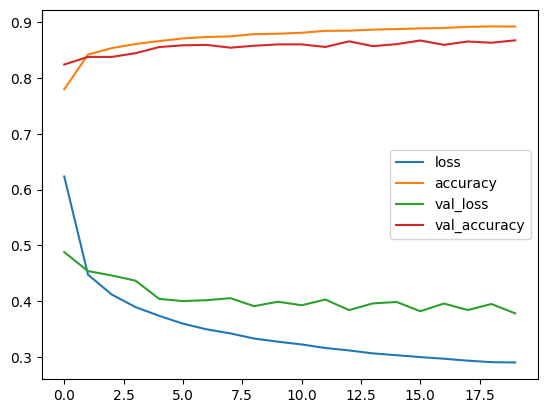

In [95]:
pd.DataFrame(norm_history.history).plot()

In [96]:
#@title Ideal Learning Rate

# create the model
model_eight = Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(
        units = 40,
        activation = 'relu'
    ),
    layers.Dense(
        units = 40,
        activation = 'relu'
    ),
    layers.Dense(
        units = 20,
        activation = 'relu'
    ),
    layers.Dense(
        activation ='softmax',
        units = 10
    )
])

# compile the model
model_eight.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = [
        'accuracy'
    ]
)

# creating the learning rate scheduler
lr_scheduler = keras.callbacks.LearningRateScheduler(
    lambda epoch : 1e-3 * 10 ** (epoch / 20)
)

# train/fit the model
history = model_eight.fit(
    train_data, train_label,
    epochs = 50,
    validation_data = (test_data, test_label),
    # callbacks = [lr_scheduler]
)

model_eight.evaluate(test_data, test_label)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5678 - accuracy: 0.7962 - val_loss: 0.4453 - val_accuracy: 0.8402
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4066 - accuracy: 0.8545 - val_loss: 0.4051 - val_accuracy: 0.8527
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3679 - accuracy: 0.8662 - val_loss: 0.4226 - val_accuracy: 0.8497
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3427 - accuracy: 0.8745 - val_loss: 0.3719 - val_accuracy: 0.8670
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3248 - accuracy: 0.8812 - val_loss: 0.3667 - val_accuracy: 0.8723
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3135 - accuracy: 0.8852 - val_loss: 0.3929 - val_accuracy: 0.8546
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3029 - accuracy: 0.8881 - val_loss: 0.3624 - val_accur

[0.42221498489379883, 0.8805999755859375]

<Axes: >

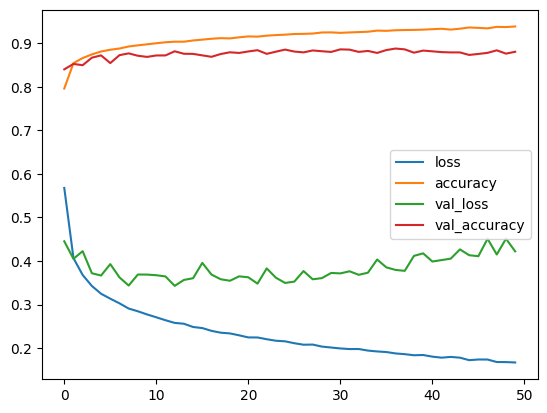

In [97]:
pd.DataFrame(history.history).plot()

In [99]:
y_probs = model_eight.predict(test_data)
index = y_probs[0].argmax()
index, label_names[index]

313/313 [==============================] - 1s 3ms/step


(9, 'Ankle Boot')

In [124]:
# getting first 10 prediction labels
y_preds = y_probs.argmax(axis = 1)

# printing first 10 predictions
# print([label_names[y_preds[x]] for x in range(10)])
first_ten_labels = np.array(label_names)[y_preds[:10]]
print(first_ten_labels)

first_ten = np.take(label_names, y_preds)
print(first_ten[: 10])

['Ankle Boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat'
 'Shirt' 'Sandal' 'Sneaker']
['Ankle Boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat'
 'Shirt' 'Sandal' 'Sneaker']


Creating the confusion matrix for this model : model_eight

[[871   5   8  32   2   2  72   0   8   0]
 [  4 971   1  16   4   0   4   0   0   0]
 [ 33   1 794  13 101   0  55   0   3   0]
 [ 21   5   7 904  26   0  28   0   9   0]
 [  2   1  78  33 845   0  41   0   0   0]
 [  0   0   0   0   0 963   0  24   4   9]
 [173   2  91  29  91   0 606   0   8   0]
 [  0   0   0   0   0  18   0 963   1  18]
 [ 16   0   1   2   5   2   9   3 961   1]
 [  0   0   0   0   0  10   1  61   0 928]]


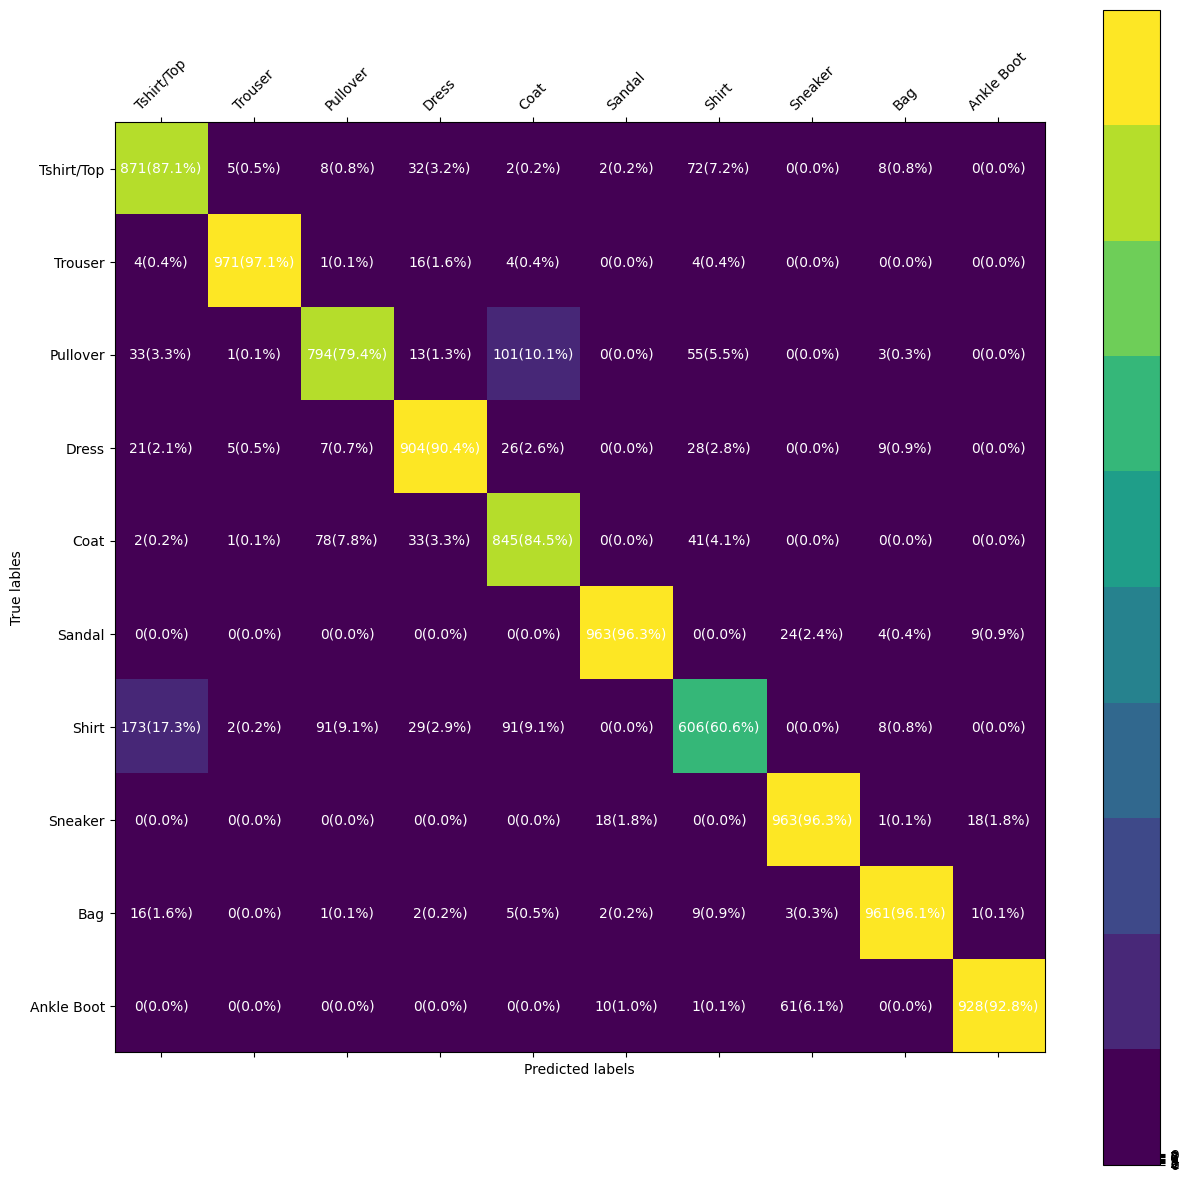

In [195]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(
    y_true = test_label,
    y_pred = y_preds
)

matrix_norm = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]
print(matrix)

# custom color adjustment
custom_cmap = plt.get_cmap(
    'viridis', len(matrix)
)

# plot size adjustment
figure, axis = plt.subplots(
    figsize = (15,15)
)

# plotting the matrix as heatmap with custom colormap
cax = axis.matshow(
    matrix,
    cmap = custom_cmap,  # interpolation has values => bicubic, nearest, bilinear, none
    interpolation = 'nearest' # interplolcation is used for pixel interpolation which is estimation of pixel values which are not defined in the matrix explicitly it has different options like 'bicubic', 'bilinear' and none
)

# customizing the colorbar
cbar = figure.colorbar(
    cax ,
    cmap = custom_cmap,
)
cbar.set_ticks(
    np.arange(0, len(matrix), 1)
)
cbar.set_ticklabels(
    range(len(matrix))
)



# adding labels to the x and y axis
plt.xlabel('Predicted labels')
plt.ylabel('True lables')
plt.xticks( # this is for labels
    np.arange(len(label_names)), label_names, rotation = 45
)
plt.yticks(
    np.arange(len(label_names)),  label_names
)

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        text = axis.text(
            j, i,  f"{matrix[i, j]}({matrix_norm[i, j] * 100:.1f}%)",
            ha = 'center', # horizontal - alignment
            va = 'center', # vertical - alignment ,
            fontsize = 10,
            color = 'white'
        )

plt.show()